<a href="https://colab.research.google.com/github/DenisePotenza/Portfolio-DS/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center>
  <img src=https://aventurasnahistoria.uol.com.br/media/_versions/titanicajjdja_widelg.jpg 
  width=400px>
  </p>

<h1 align=center>Titanic - Machine Learning from Disaster!</h1>

**Titanic's disaster is one of the most known in the world. Everybody knows the famous history of the ship that sank after beating in an iceberg.** 
**In data science, it became one of the most popular Kaggle competitions, some people even say that this is the 'Hello World' of machine learning!**


## **About this notebook!**

*As mentioned before, this is one of the most famous competitions on Keggle for beginners. The goal here is to measure the chance of survival using the data in this dataset.*</br>
*The complete description of this competition may be found on [Kaggle](https://www.kaggle.com/c/titanic/overview)*

##**1 - Problem Definition**
###**Some history!**

*RMS Titanic was built in the Belfast-United Kingdom. It was the second ship of Olympic Class ocean liners, after RMS Olympic and followed by RMS Britannic. The built started in 1909 March and ended in 1911 May. Titanic was built to be the more luxurious and safety ship of its time.*
*Its first, and only trip, started on April 10 of 1912. The ship left the Southhampton Port to New York, passing in Cherbourg-Octeville-France and Queenstown-Ireland. It collides on an iceberg at 11:30 pm on April 14 of 1912 and sank on April 15 with more than 2000 people aboard.*

**Passengers:**
*The ship had 1316 passengers on board.*
* 325 in the first class. Here stayed the most riches on the ship, like businessmen, artists, military officers, politicians, and others. In many cases, they traveled with many luggage and one or more employee.

* 285 in the second class. This class had more diversity. I included businessmen, teachers, clerics and immigrants, that was rich and were going back to their country for Christmas.

* 706 in the third class. The third class was the immigrants. Were people that traveled in a big family group with up to 12 people. They came from different parts of Europe. For this reason, the third class was the only one required to pass a health surveillance examination.

**Ports:**
*As mentioned before, Titanic has passed through three different ports.*
* Southhampton - The United Kingdom, 922 people embarked.
* Cherbourg-Octeville - France, 274 people embarked.
* Queenstown - Ireland, 120 people embarked.

**Crew:**
*Titanic had a crew of almost 900 people.*
* 66 Deck Crew.
* 325 Mechanics.
* 494 Service Staff.

*The number of survivors is uncertain, some people didn't embark, some embarked under a pseudonym. The total number of victims more accepted is 1514 people, and 710 survivors.*

##**2 - Data Exploration**
*The datasets used in this notebook is available on [Kaggle](https://www.kaggle.com/c/titanic/overview). It was split into two datasets, one for the train with 891 lines and the other for the test, with 418 lines, both having 12 columns.*
* Train dataset (train.csv)
  * Must be used for building the machine learning model. Here is informed if the passenger survived or not.
  * Has many features like the gender, class and embark port.
* Test dataset (test.csv)
  * It must be used to test the machine learning model. Here the information if the passenger survived or not isn't present.

In [0]:
#Basic Libraries
import numpy as np
import pandas as pd

#Shows all columns
pd.options.display.max_columns=None

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set2')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/DenisePotenza/Portfolio-DS/master/Datasets/TITANIC%20-%20train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/DenisePotenza/Portfolio-DS/master/Datasets/TITANIC%20-%20test.csv')

**Checking the number of lines and columns on both datasets.**

In [3]:
print('Train Dataset:\nLines:\t\t{}\nColumns:\t{}\n'.format(train.shape[0], train.shape[1]))
print('Test Dataset:\nLines:\t\t{}\nColumns:\t{}'.format(test.shape[0], test.shape[1]))

Train Dataset:
Lines:		891
Columns:	12

Test Dataset:
Lines:		418
Columns:	11


This first analysis will show the name of each variable and its type, the missing values, and type of distribution.

In this case, the dataset has the target variable, 'Survived', so, it's gonna be used supervised learning.
###**Data Dictionary**
* PassangerId - Id number of each passenger
* Survived - Inform if the passenger survived or not
  *	0 = No
  * 1 = Yes
* PClass - A proxy for socio-economic status
  *	1 = 1st Class - Upper
  * 2 = 2nd Class - Middle
  * 3 = 3rd Class - Lower
* Sex	- The passenger gender	
* Age	- Age in years of the passengers
* SibSp - The dataset defines family relations in this way
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch	- The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them
* Ticket	- The ticket number	
* Fare - The passenger fare	
* Cabin	- Cabin number	
* Embarked	- The Port of Embarkation	
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

###**The type of each data**  
* Numerical Variables
  * PClass
  * SibSp
  * Parch
  * Age
  * Fare
  * Target
    * Survived
  * Primary Key
    * PassngerId
* Categorical Variables
  * Name
  * Sex
  * Ticket
  * Cabin
  * Embarked

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q:** How many missing values in the dataset?

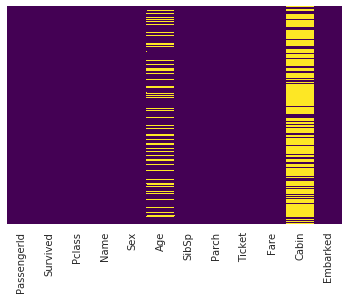

In [5]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

**Checking the percentage of missing value per column.**

This analysis shows us that in both datasets, the Cabin column has the most part of missing values followed by Age. In the train dataset, has 2 lines on the Embark column that are missing, and in the test dataset, it has 1 line on the Fare column. This will be treated later.

In [6]:
#Missing value in each dataset
print('Number of missing values in each column on train dataset:')
print(train.isnull().sum(), '\n')
print('Number of missing values in each column on test dataset:') 
print(test.isnull().sum())

Number of missing values in each column on train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Number of missing values in each column on test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Statistical Distribution**

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As it was expected, the names are unique values.

In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lam, Mr. Ali",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


**Q:** What sex had the most survivors?

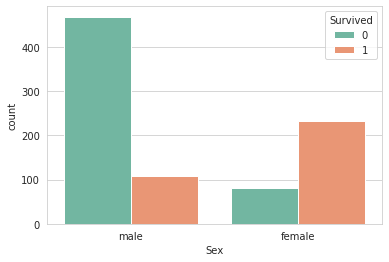

In [9]:
sns.countplot(x='Sex', data=train, hue='Survived');

**Q:** What gender had more Siblings/Spouses aboard and how does this influence the chances of survival?

In this case, for male it's almost doesn't influence that much, but for women, it has a large difference. The more siblings or spouses, the greater the chance of not surviving.

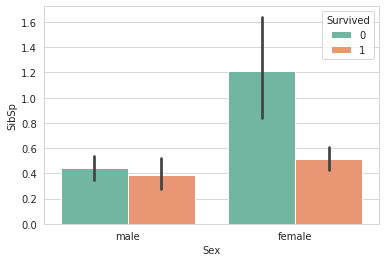

In [10]:
sns.barplot(x='Sex', y='SibSp', data=train, hue='Survived');

**Q:**What gender had more parents/children aboard and how does this influence the chances of survival?

In this case, for the male gender, as the more parents/children aboard, the greater the chance of survival. For female gender it is the contrary.

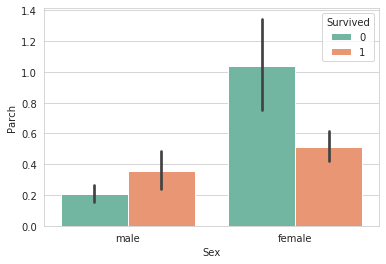

In [11]:
sns.barplot(x='Sex', y='Parch', data=train, hue='Survived',palette='Set2');

**Q:** How many people survived in each class per gender?

It's undeniable that the first and second classes had more chances to survive, and confirms the information above, women had more chances to survive than men.

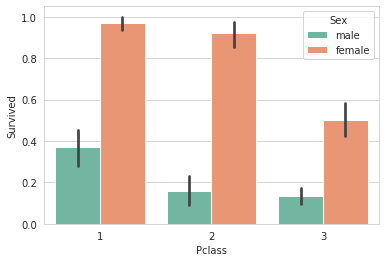

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train, hue='Sex');

**First graphic -** Survivors per Class. Again, first and second class had more chances to survive.

**Second graphic -** Survivors per Embark port. For some reason, the people who embarked on Cherbourg-Octeville in France had more chances to survive.

**Third graphic -** Survivors per Fare. And again, who paid more, had more chances to survive.

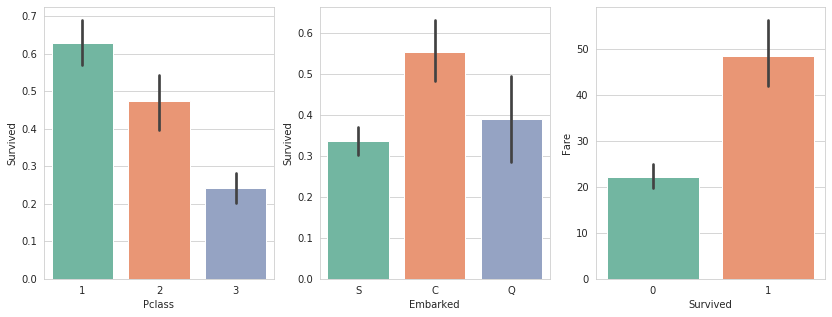

In [13]:
fig, (axis1, axis2, axis3)= plt.subplots(1,3, figsize=(14,5))


sns.barplot(x='Pclass', y='Survived', data=train, ax=axis1)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis2)
sns.barplot(x='Survived', y='Fare', data=train, ax=axis3);

**Q:** Which is the survivors age?

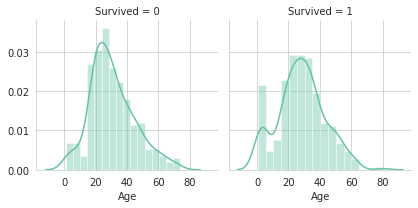

In [14]:
survived_age=sns.FacetGrid(data=train, col='Survived')
survived_age.map(sns.distplot, 'Age');

**Q:** Had relatieves aboard influences survival?

As the least relatives aboard, the more the chance to survive.

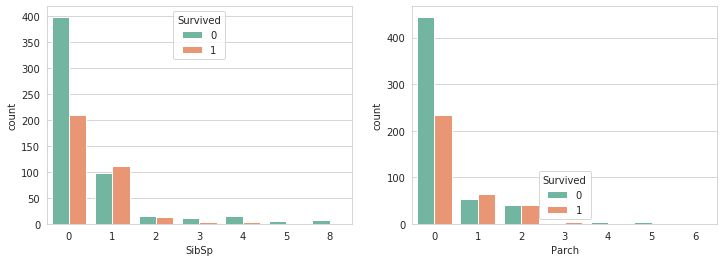

In [15]:
fig, (axis1, axis2)=plt.subplots(1,2, figsize=(12,4))

sns.countplot(x='SibSp', hue='Survived', data=train, ax=axis1)
sns.countplot(x='Parch', hue='Survived', data=train, ax=axis2);

**Q:**What is the correlation between the features and the target?

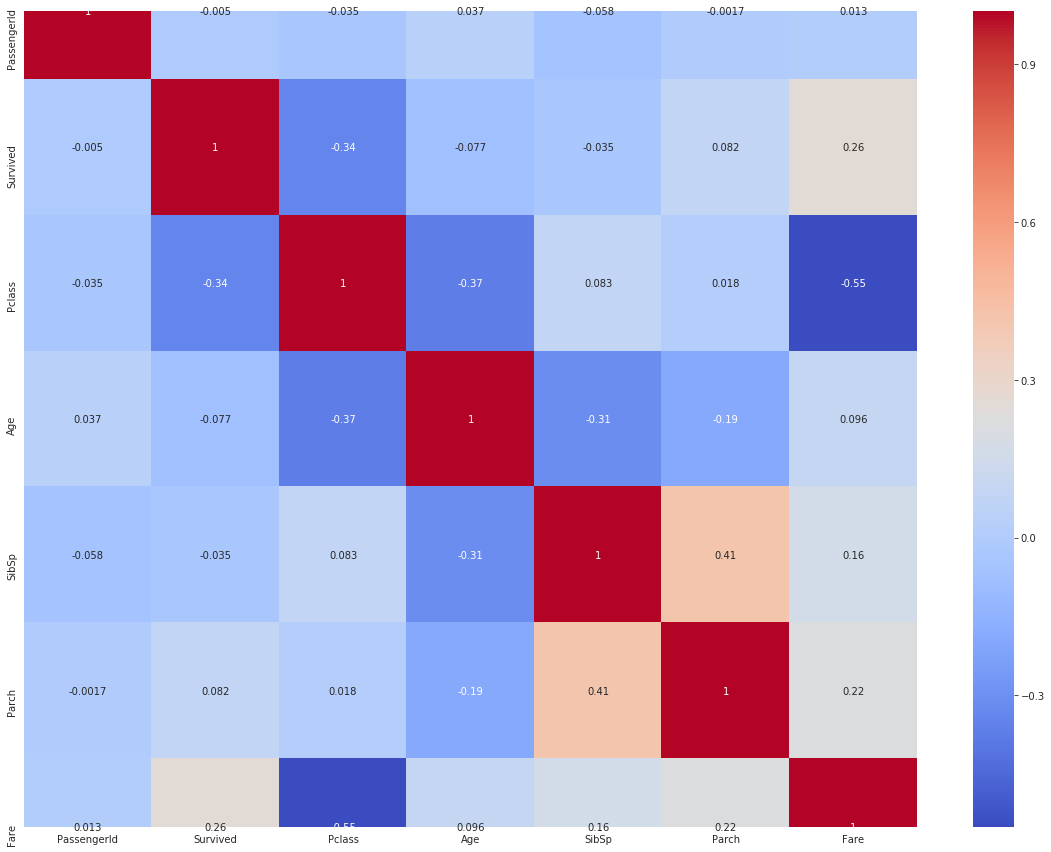

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm');

A few blocks above, it appears that the train and test dataset had few lines in Embarked and Fare column with missing values.

In the train dataset, the 2 lines with missing values on the Embarked column will be dropped, and in the test dataset, the only missing value on the Fare column will be filled with 0.

In [0]:
#Dopping the lines with missing value 
train.dropna(subset=['Embarked'],inplace=True)

In [0]:
#Replacing the missing value for 0
test['Fare'].replace(np.nan, 0, inplace=True)

**Checking if there remains some missing value on the Embark and Fare columns**

In [19]:
#Checking missing values
print('Train null lines:\n',train.isnull().sum(),'\n')
print('Test null lines:\n',test.isnull().sum(),'\n')

Train null lines:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

Test null lines:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64 



##**3 - Data Preparation**

As it shows before, there are many missing values on the Age and Cabin columns.
To make it easier to clean, and fill the missing values the two datasets will be merged in one.

In [0]:
#Extract and delete the target from train dataset
target = train.Survived.copy()
train.drop('Survived', axis=1, inplace=True)

#Saving both datasets index
train_index = train.shape[0]
test_index = test.shape[0]

#Savind test id for kaggle submit latter
test_id = test.PassengerId

#Joining the two datasets in one to clean and manipulate
df_titanic = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [21]:
#The two datasets merged shape
print('df_titanic:\nLines:\t\t{}\nColumns:\t{}'.format(df_titanic.shape[0], df_titanic.shape[1]))

df_titanic:
Lines:		1307
Columns:	11


###**Filling the missing values on the Age and Cabin columns**

The Cabin and Age columns remain with many missing values. To solve this, the module Simple Imputer will fill the lines with different methods for each column. On the Age feature it will be used the mean of the values from this column, and for the Cabin will be used the most frequent value.

In [0]:
imputer_age = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_cabin = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_age = imputer_age.fit(df_titanic[['Age']])
imputer_cabin = imputer_cabin.fit(df_titanic[['Cabin']])
df_titanic['Age'] = imputer_age.transform(df_titanic[['Age']])
df_titanic['Cabin'] = imputer_cabin.transform(df_titanic[['Cabin']])

Now that all changes were done, the only useless column, PassengerId, will be dropped.

In [0]:
df_titanic.drop(['PassengerId'],axis=1, inplace=True)

In [24]:
df_titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S


The names are unique, but when looking at it close, they have a treatment pronoun. So it was created a function to split the name and get this pronoun, this will be used to build our model.

In [0]:
def return_name(name):

  '''Returns the treatment pronoun of each line in the column name'''
  
  name = name.split(',')
  return(name[1].split('.')[0])
    

In [0]:
#Apply the function on the column
df_titanic['Name'] = df_titanic['Name'].apply(return_name)

For this model, the categorical variables will be changed to numerical variables using the LabelEncoder module.

In [27]:
#Create a list with all the categorical variables
cat_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

#Creating a variable with the LabelEncoder functions 
encoder=LabelEncoder()

#Apply the label encoder to each column
encoded=df_titanic[cat_features].apply(encoder.fit_transform)
encoded.head()

,Name,Sex,Ticket,Cabin,Embarked
0,12,1,719,79,2
1,13,0,815,105,0
2,9,0,913,79,2
3,13,0,64,69,2
4,12,1,648,79,2


These variables must be put in the dataset replacing the categorical ones. But before the variables must be renamed.

In [0]:
#Renaming the columns
encoded.rename(columns={'Name': 'Name_encoded', 'Sex': 'Sex_encoded',
                        'Ticket': 'Ticket_encoded', 'Cabin':'Cabin_encoded', 'Embarked': 'Embarked_encoded'}, inplace=True)

In [29]:
#Checking the columns renamed.
encoded.head()

,Name_encoded,Sex_encoded,Ticket_encoded,Cabin_encoded,Embarked_encoded
0,12,1,719,79,2
1,13,0,815,105,0
2,9,0,913,79,2
3,13,0,64,69,2
4,12,1,648,79,2


Now that the columns became numerical, it is time to merge the columns encoded to the dataset and drop the categoricals.

In [0]:
#Concating the encoded varible to dataset
df_titanic = pd.concat(objs=[df_titanic, encoded], axis=1)

#Dropping the categorical columns
df_titanic.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [31]:
#Checking the dataset after the changes
df_titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Name_encoded,Sex_encoded,Ticket_encoded,Cabin_encoded,Embarked_encoded
0,3,22.0,1,0,7.2500,12,1,719,79,2
1,1,38.0,1,0,71.2833,13,0,815,105,0
2,3,26.0,0,0,7.9250,9,0,913,79,2
3,1,35.0,1,0,53.1000,13,0,64,69,2
4,3,35.0,0,0,8.0500,12,1,648,79,2


After all the changes, the dataset must be split in two again for us to starting to build the model. 

In [0]:
#Separating the datasets in train and test
train=df_titanic.iloc[:train_index]
test=df_titanic.iloc[train_index:]

##**4 - Building the Model**
Now that the dataset was explored and analyzed, it's time to build the machine learning model. First of all, it must be decided the best model, to get this, let's test some methods and check which returns the best score.
It's gonna be tested RandomForest, ExtraTreesForest, and XGBClassifier. To get the best params it will be used the GridSearch method, it tests a list of params to find which returns the best configuration.  Before starting, the variable containing features columns and the variable containing the target must be created.

In [0]:
#X - Feature variable, y - target variable
y=target.copy()
X=train.copy()

Testing the ExtraTrees accuracy.

In [43]:
#Assign the ExtraTrees model
model = ExtraTreesClassifier()

#Defining the list of params to test and choose the best
n_estimators=[250, 300, 350, 400]
max_depth=[1,2, 3]

#Training the model using the params above
param_grid=dict(max_depth=max_depth, n_estimators=n_estimators)
kfold=StratifiedKFold(n_splits=20, shuffle=True, random_state=0)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy",n_jobs=4, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)

#Printing the best results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with %r:' %(mean, stdev, param))

Fitting 20 folds for each of 12 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   55.6s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  1.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.806524 using {'max_depth': 3, 'n_estimators': 250}
0.751406 (0.052811) with {'max_depth': 1, 'n_estimators': 250}:
0.761530 (0.048472) with {'max_depth': 1, 'n_estimators': 300}:
0.753656 (0.052400) with {'max_depth': 1, 'n_estimators': 350}:
0.763780 (0.057112) with {'max_depth': 1, 'n_estimators': 400}:
0.798650 (0.066369) with {'max_depth': 2, 'n_estimators': 250}:
0.804274 (0.071089) with {'max_depth': 2, 'n_estimators': 300}:
0.796400 (0.072503) with {'max_depth': 2, 'n_estimators': 350}:
0.805399 (0.060320) with {'max_depth': 2, 'n_estimators': 400}:
0.806524 (0.073468) with {'max_depth': 3, 'n_estimators': 250}:
0.800900 (0.072128) with {'max_depth': 3, 'n_estimators': 300}:
0.805399 (0.074853) with {'max_depth': 3, 'n_estimators': 350}:
0.802025 (0.070443) with {'max_depth': 3, 'n_estimators': 400}:


Let's test the ExtraTrees model on the test dataset and send the result to Kaggle.

In [0]:
#Using the model in the test dataset
test_pred = grid_result.predict(test)

submission = pd.DataFrame({
    'PassengerId': test_id,
    'Survived': test_pred
})

#Generating the file to submit
submission.to_csv('submission_extra.csv', index=False)

The Results!

<img src=https://raw.githubusercontent.com/DenisePotenza/Portfolio-DS/master/Images/titanic-extras.jpg width=800px>

Testing the RandomForest accuracy.

In [42]:
#Assign the RandomForest model
model=RandomForestClassifier()

#Defining the list of params to test and choose the best
n_estimators=[250, 300, 350, 400]
max_depth=[1,2, 3]

#Training the model using the params above
param_grid=dict(max_depth=max_depth, n_estimators=n_estimators)
kfold=StratifiedKFold(n_splits=20, shuffle=True, random_state=0)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy",n_jobs=4, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)

#Printing the best results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with %r:' %(mean, stdev, param))

Fitting 20 folds for each of 12 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.818898 using {'max_depth': 3, 'n_estimators': 250}
0.772778 (0.051433) with {'max_depth': 1, 'n_estimators': 250}:
0.781777 (0.060624) with {'max_depth': 1, 'n_estimators': 300}:
0.766029 (0.052326) with {'max_depth': 1, 'n_estimators': 350}:
0.769404 (0.051348) with {'max_depth': 1, 'n_estimators': 400}:
0.787402 (0.060493) with {'max_depth': 2, 'n_estimators': 250}:
0.790776 (0.064492) with {'max_depth': 2, 'n_estimators': 300}:
0.796400 (0.065791) with {'max_depth': 2, 'n_estimators': 350}:
0.797525 (0.064891) with {'max_depth': 2, 'n_estimators': 400}:
0.818898 (0.067866) with {'max_depth': 3, 'n_estimators': 250}:
0.814398 (0.063353) with {'max_depth': 3, 'n_estimators': 300}:
0.812148 (0.062241) with {'max_depth': 3, 'n_estimators': 350}:
0.814398 (0.064195) with {'max_depth': 3, 'n_estimators': 400}:


Let's test the RandomForest model on the test dataset and send the result to Kaggle.

In [0]:
#Using the model in the test dataset
test_pred = grid_result.predict(test)

submission = pd.DataFrame({
    'PassengerId': test_id,
    'Survived': test_pred
})

#Generating the file to submit
submission.to_csv('submission_random.csv', index=False)

The Results!

<img src=https://raw.githubusercontent.com/DenisePotenza/Portfolio-DS/master/Images/titanic-random.jpg width=800px>

Testing the XGBClassifier accuracy.

In [38]:
#Assign the XGBClassifier model
model=XGBClassifier()

#Defining the list of params to test and choose the best
n_estimators=[150, 200, 250, 300]
max_depth=[1,2, 3]
learning_rate=[0.1,0.2]

#Training the model using the params above
param_grid=dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
kfold=StratifiedKFold(n_splits=20, shuffle=True, random_state=0)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy",n_jobs=4, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)

#Printing the best results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with %r:' %(mean, stdev, param))

Fitting 20 folds for each of 24 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.6s


Best: 0.848144 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.817773 (0.061339) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}:
0.822272 (0.065798) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}:
0.821147 (0.065439) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}:
0.824522 (0.064294) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}:
0.830146 (0.060843) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}:
0.833521 (0.060048) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}:
0.839145 (0.059236) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}:
0.844769 (0.058964) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}:
0.841395 (0.068865) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}:
0.845894 (0.060389) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}:
0.848144 (0.059229) with {'learning_rate': 0.1, 'max_depth'

[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:   37.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Let's test the XGBClassifier model on the test dataset and send the result to Kaggle.

In [0]:
#Using the model in the test dataset
test_pred = grid_result.predict(test)

submission = pd.DataFrame({
    'PassengerId': test_id,
    'Survived': test_pred
})

#Generating the file to submit
submission.to_csv('submission_xgb.csv', index=False)

The Results!

<img src=https://raw.githubusercontent.com/DenisePotenza/Portfolio-DS/master/Images/titanic-xgb.jpg width=800px>

The training model had the best result using XGBClassifier, with 0.848144 of accuracy. But when submited to kaggle, the RandomForest had the best result with 0.78468.

This was my Titanic analysis and machine learning model. I hope you to enjoy and any feedback are pretty welcome!
Thank you for your vistit!

Contact me:</br>
[GitHub](https://github.com/DenisePotenza/Portfolio-DS)

[Linkedin](https://www.linkedin.com/in/denise-ribeiro-potenza-75959813/)

[Facebook](https://www.facebook.com/deniseribeiro.potenza?ref=bookmarks)

[Instagram](https://www.instagram.com/denise_potenza/?hl=pt-br)

E-mail: denisepotenza@gmail.com
